In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

import networkx as nx

from scipy.spatial import distance
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.6, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=width, vert_gap = vert_gap, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:

            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

/omics/groups/OE0540/internal/B260/users/olga/.conda/envs/torch_geo/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clones = pd.read_csv("../data/interim/clones_over.csv", index_col = 0)

In [ ]:
rna_cna = pd.read_csv("../data/interim/FRP_copykat_CNA_results.txt", sep = "\t", index_col = 2)


In [ ]:
chrom = pd.read_csv("../data/interim/FRP_copykat_CNA_results.txt", sep = "\t", usecols= ["chrom"])

In [4]:
rna_cna = rna_cna.drop(columns = ["chrom","chrompos"])
rna_cna.columns = [x.replace(".","-") for x in rna_cna.columns]
rna_cna = rna_cna.T

In [5]:
rna_cna = rna_cna.loc[clones.index]

In [14]:
chrom.index = rna_cna.columns

In [15]:
import PyComplexHeatmap
from PyComplexHeatmap import *
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [16]:
col = {'1': '#999993',
 '2': '#eeeee4',
 '3': '#999993',
 '4': '#eeeee4',
 '5': '#999993',
 '6': '#eeeee4',
 '7': '#999993',
 '8': '#eeeee4',
 '9': '#999993',
 '10': '#eeeee4',
 '11': '#999993',
 '12': '#eeeee4',
 '13': '#999993',
 '14': '#eeeee4',
 '15': '#999993',
 '16': '#eeeee4',
 '17': '#999993',
 '18': '#eeeee4',
 '19': '#999993',
 '20': '#eeeee4',
'21': '#999993',
'22': '#eeeee4',
 'X': '#999993',
 'Y': '#eeeee4'}

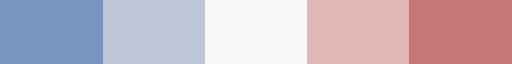

In [19]:
newcmp = list(sns.color_palette("vlag",5))
newcmp[2] = "#F9F9F9"
newcmp = ListedColormap(newcmp)   
newcmp

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations


KeyError: 1

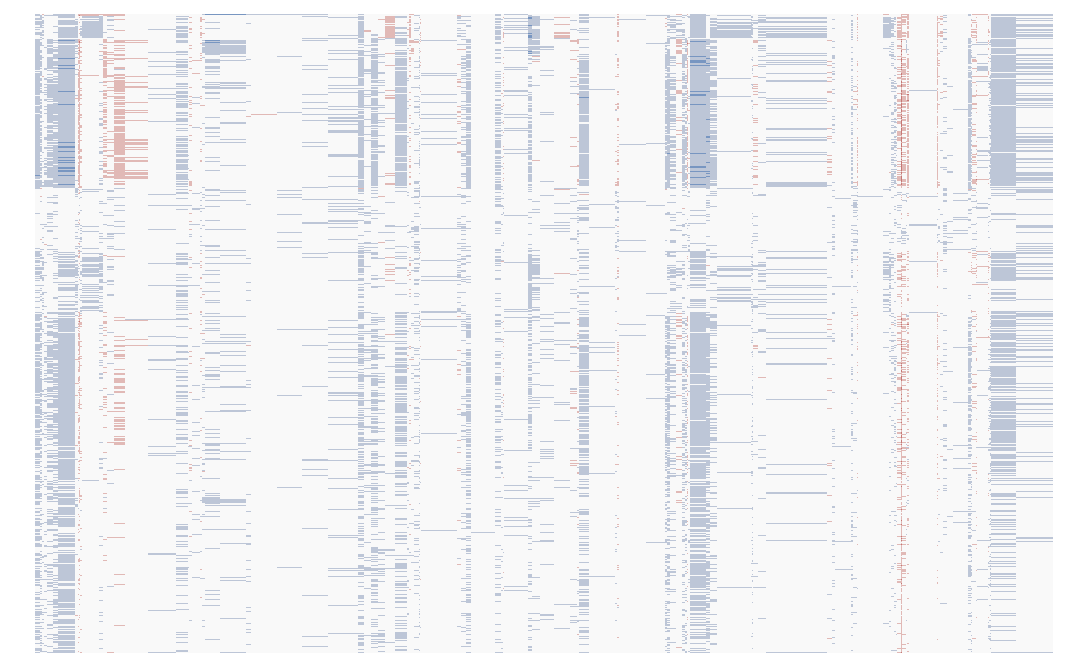

In [20]:
plt.figure(figsize=(19, 12))

col_ha = HeatmapAnnotation(chrom = anno_simple(chrom.chrom,add_text=True, colors = col, text_kws ={"color": "black"} ),
                           plot_legend = False, axis = 1, plot = False)
row_ha = HeatmapAnnotation(assay = anno_simple(clones.leiden,add_text=True,legend_kws={'frameon':False},text_kws={'fontsize':10} ),plot_legend = False,
                          axis = 0,label_kws = {'visible':False}, legend_width = 2, hgap =0.01, plot = False)
cm1 = ClusterMapPlotter(data=rna_cna,row_dendrogram=True,show_rownames=False,show_colnames=False,top_annotation = col_ha,
                       row_cluster_metric = "euclidean",col_cluster = False,
                      row_cluster = True, label='log ratio', cmap = newcmp, right_annotation = row_ha)


plt.show()

In [7]:
clones = clones.leiden

In [11]:
cons_sc = []
sc_clone_size = {}
for cl in range(len(set(clones))):
    idx = np.where(clones == cl)[0]
    values = rna_cna.iloc[idx]
    values = values.median().values
    cons_sc.append(values)
    sc_clone_size[cl] = len(idx)

In [33]:
sc_clone_size

{0: 879,
 1: 782,
 2: 763,
 3: 689,
 4: 655,
 5: 580,
 6: 537,
 7: 493,
 8: 490,
 9: 456,
 10: 433,
 11: 425,
 12: 372,
 13: 331,
 14: 329,
 15: 320,
 16: 320,
 17: 317,
 18: 262,
 19: 229,
 20: 214,
 21: 203,
 22: 202,
 23: 197,
 24: 106,
 25: 87,
 26: 50}

In [12]:
cons_sc = pd.DataFrame(cons_sc, columns = rna_cna.columns)

In [13]:
cons = cons_sc.T.copy()
diploid_id = cons.columns[-1]+1
cons[diploid_id] = 0
cons = cons.T
n_clusters = cons.shape[0]
X = np.zeros((n_clusters, n_clusters))
for c1 in range(n_clusters):
    cells1 = cons.loc[c1]
    for c2 in range(n_clusters):

        cells2 =  cons.loc[c2]
        dist = np.linalg.norm(cells1-cells2)
        X[c1,c2] = dist
        if c1 != c2 and dist ==0:
            dist = 1e-06
            X[c1,c2] = dist

In [14]:
X = np.tril(X, -1)
X = csr_matrix(X)
Tcsr = minimum_spanning_tree(X)
tree = Tcsr.toarray().astype(int)

In [29]:
G = nx.Graph()
root = diploid_id

for i in range(np.shape(tree)[0]):
    for j in range(i+1,np.shape(tree)[0]):
        if tree[j,i]>0:
            if i == diploid_id:
                node_i_l = "sudo root"
                node_j_l = f"clone {j}"
            elif j == diploid_id:
                node_j_l = "sudo root"
                node_i_l = f"clone {i}"
            else:
                node_i_l = f"clone {i}"
                node_j_l = f"clone {j}"

            G.add_node(i)
            G.add_node(j)

            G.add_edge(i,j)


#colors = [node_colors.to_dict()[i] for i in G.nodes]
mapping = {x:f"{x}" if x !=diploid_id else "pseudo root" for x in G.nodes}
H = nx.relabel_nodes(G, mapping)


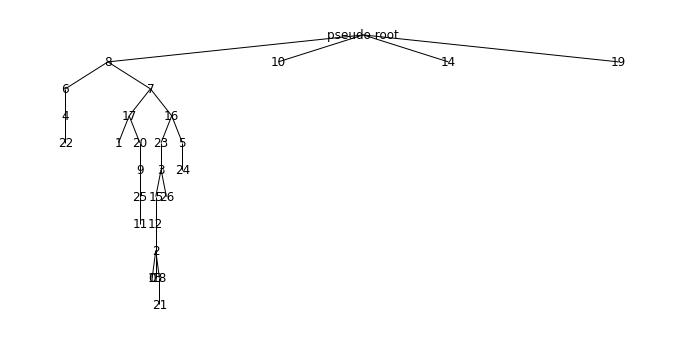

In [80]:
pos = hierarchy_pos(H,"pseudo root", vert_gap = 5, width = 10)  
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)
nx.draw(H,pos, with_labels=True, node_size = 0, ax = ax )

In [90]:
sg = H.subgraph(["8","10","14","19", "pseudo root"])

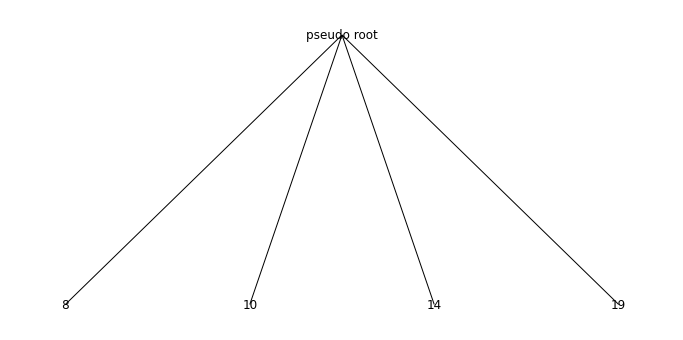

In [91]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)
nx.draw(sg,pos, with_labels=True, node_size = 0, ax = ax )

In [51]:
def hierarchy(G, root=None):

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root,parent = None, pos = None):
    
        if pos is None:
            pos = {root:set()}
        if root not in pos:
            pos[root] = set()
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            for child in children:
                pos[root].add(child)
                pos = _hierarchy_pos(G,child,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root)

In [52]:
branches = hierarchy(H,"pseudo root")

In [73]:
print(len(branches['pseudo root']))
for key in branches:
    children = list(branches[key])
    for child in children:
        branches[key] = branches[key].union(branches[child])

27


In [74]:
branches

{'pseudo root': {'0',
  '1',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9'},
 '8': {'0',
  '1',
  '11',
  '12',
  '13',
  '15',
  '16',
  '17',
  '18',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '3',
  '4',
  '5',
  '6',
  '7',
  '9'},
 '6': {'22', '4'},
 '4': {'22'},
 '22': set(),
 '7': {'0',
  '1',
  '11',
  '12',
  '13',
  '15',
  '16',
  '17',
  '18',
  '2',
  '20',
  '21',
  '23',
  '24',
  '25',
  '26',
  '3',
  '5',
  '9'},
 '17': {'1', '11', '20', '25', '9'},
 '1': set(),
 '20': {'11', '25', '9'},
 '9': {'11', '25'},
 '25': {'11'},
 '11': set(),
 '16': {'0', '12', '13', '15', '18', '2', '21', '23', '24', '26', '3', '5'},
 '23': {'0', '12', '13', '15', '18', '2', '21', '26', '3'},
 '3': {'0', '12', '13', '15', '18', '2', '21', '26'},
 '15': {'0', '12', '13', '18', '2', '21'},
 '12': {'0', '13', '18', '2', '21'},
 '